# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq
import time
import scipy.stats as sts
from pprint import pprint
# Import API key
from config import openwather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Generate Cities List

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#start a counter for city #
city_count = 0

# start empty lists to store data for our DF
City_ID = []
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_Temp = []
Wind_Speed = []

In [5]:
# use for loop to cycle thru API call and gather raw data
for city in cities:
    # create a try/except for cities not found on open weather api
    try:
        # call api inside of our try/except
        response = rq.get(f'http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={openwather_api_key}').json()
        
        # add 1 to count for each iteration
        city_count += 1
        
        # append data to our empty lists
        City_ID.append(response['id'])
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        
        # Include a print log of each city as it's being processed
        #print(f'City Name: {city} - City Number: {city_count}')
        #print()
        
    except:
        # print value if not found
        print('City not Found, skipping...')

City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skipping...
City not Found, skip

### DataFrame
* Convert Raw Data to a DataFrame
* Display the DataFrame
    * Headers should be: 'City_ID', 'City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat','Lng', 'Max_Temp', 'Wind_Speed'

In [6]:
# gather list created from for loop to build dataframe
lst_of_list = [
               City_ID,
               City,
               Cloudiness,
               Country,
               Date,
               Humidity,
               Lat,
               Lng,
               Max_Temp,
               Wind_Speed
              ]
#create dataframe with lists
city_df = pd.DataFrame(lst_of_list) 

#Lists became rows instead of colums so need to flip them
city_df = city_df.transpose()

#rename columns
city_df.columns = ['City_ID', 'City', 'Cloudiness',
                   'Country', 'Date', 'Humidity',
                   'Lat','Lng', 'Max_Temp', 'Wind_Speed']

In [7]:
city_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,2122614,Okha,100,RU,1612330021,84,53.5739,142.948,-21.14,20.2
1,5106841,Albany,98,US,1612329967,87,42.6001,-73.9662,27,9.33
2,3466704,Castro,96,BR,1612330021,94,-24.7911,-50.0119,64.54,3.2
3,1015776,Bredasdorp,0,ZA,1612330021,94,-34.5322,20.0403,60.8,2.3
4,2961459,Skibbereen,0,IE,1612330021,93,51.55,-9.2667,37.4,9.22
...,...,...,...,...,...,...,...,...,...,...
568,2446796,Bilma,0,NE,1612330090,35,18.6853,12.9164,57.67,10.92
569,5101798,Newark,90,US,1612330090,74,40.7357,-74.1724,32,8.05
570,1529376,Korla,1,CN,1612330090,64,41.7597,86.1469,35.26,2.91
571,1121143,Zabul Province,0,AF,1612330090,68,32.25,67.25,39.76,3.89


## Output File (CSV)
* Export the city data DataFrame into a .csv file

In [8]:
# export info to CSV
city_df.to_csv('../output_data/cities2.csv', index=False)
#check output was succesful
pd.read_csv('../output_data/cities2.csv')

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,2122614,Okha,100,RU,1612330021,84,53.5739,142.9478,-21.14,20.20
1,5106841,Albany,98,US,1612329967,87,42.6001,-73.9662,27.00,9.33
2,3466704,Castro,96,BR,1612330021,94,-24.7911,-50.0119,64.54,3.20
3,1015776,Bredasdorp,0,ZA,1612330021,94,-34.5322,20.0403,60.80,2.30
4,2961459,Skibbereen,0,IE,1612330021,93,51.5500,-9.2667,37.40,9.22
...,...,...,...,...,...,...,...,...,...,...
568,2446796,Bilma,0,NE,1612330090,35,18.6853,12.9164,57.67,10.92
569,5101798,Newark,90,US,1612330090,74,40.7357,-74.1724,32.00,8.05
570,1529376,Korla,1,CN,1612330090,64,41.7597,86.1469,35.26,2.91
571,1121143,Zabul Province,0,AF,1612330090,68,32.2500,67.2500,39.76,3.89


## Inspect the data
* Remove the cities where the humidity > 100%.
    * Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
index = city_df.loc[city_df['Humidity']>100].index
index
# No values returned with humidity > 100

Int64Index([], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = city_df.drop(index, inplace=False)
clean_city_df

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,2122614,Okha,100,RU,1612330021,84,53.5739,142.948,-21.14,20.2
1,5106841,Albany,98,US,1612329967,87,42.6001,-73.9662,27,9.33
2,3466704,Castro,96,BR,1612330021,94,-24.7911,-50.0119,64.54,3.2
3,1015776,Bredasdorp,0,ZA,1612330021,94,-34.5322,20.0403,60.8,2.3
4,2961459,Skibbereen,0,IE,1612330021,93,51.55,-9.2667,37.4,9.22
...,...,...,...,...,...,...,...,...,...,...
568,2446796,Bilma,0,NE,1612330090,35,18.6853,12.9164,57.67,10.92
569,5101798,Newark,90,US,1612330090,74,40.7357,-74.1724,32,8.05
570,1529376,Korla,1,CN,1612330090,64,41.7597,86.1469,35.26,2.91
571,1121143,Zabul Province,0,AF,1612330090,68,32.25,67.25,39.76,3.89


----
# Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* With each plot add a sentence or two explaining what the code is analyzing
* Save the plotted figures as .pngs.
----

## Latitude vs. Temperature Plot
The below plot 'Max Temp (F) vs. Latitude' shows:
* This plot seems to indicate that moving further away from the equator in either direction reduces the max temp.
* It would appear moving further north seems to have a more drastic negative correlation than moving further south.

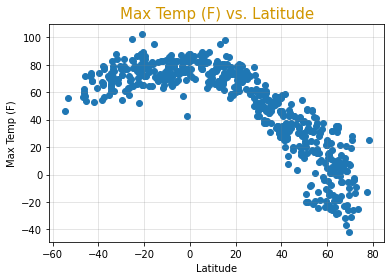

In [36]:
#plot the data
plt.scatter(clean_city_df['Lat'],clean_city_df['Max_Temp'])
#format table
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(color='grey', alpha=.25)
plt.title('Max Temp (F) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#d19600'})
#save the image
plt.savefig('../output_data/Max Temp (F) vs. Latitude.png', format='png')
# show the image
plt.show()

## Latitude vs. Humidity Plot

The below plot 'Humidity (%) vs. Latitude' shows:
* Over all that latitude is not a reliable factor in determining the humity levels of a locaiton.
* The majority of data seems to be located in the northern hemisphere.

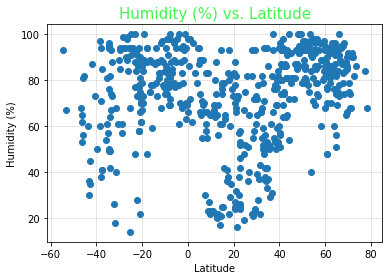

In [37]:
#plot the data
plt.scatter(clean_city_df['Lat'],clean_city_df['Humidity'])
#format table
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(color='grey', alpha=.25)
plt.title('Humidity (%) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#42f54e'})
#save the image
plt.savefig('../output_data/Humidity (%) vs. Latitude.png', format='png')
# show the image
plt.show()

## Latitude vs. Cloudiness Plot

The below plot 'Cloudiness (%) vs. Latitude' shows:
* The data on cloudiness seems to have no correlation to latitude.

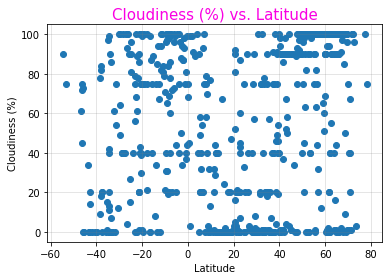

In [38]:
#plot the data
plt.scatter(clean_city_df['Lat'],clean_city_df['Cloudiness'])
#format table
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(color='grey', alpha=.25)
plt.title('Cloudiness (%) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#fa00e3'})
#save the image
plt.savefig('../output_data/Cloudiness (%) vs. Latitude.png', format='png')
# show the image
plt.show()

## Latitude vs. Wind Speed Plot

The below plot 'Wind Speed (mph) vs. Latitude' shows:
* The plot below shows that the majority of locations have low wind speeds beteen 5-10 mph.
* Very few locations get over 25mph windspeeds.
* There is little to no correlation between windspeed and latitude

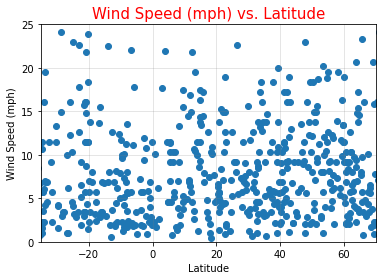

In [39]:
#plot the data
plt.scatter(clean_city_df['Lat'],clean_city_df['Wind_Speed'])
#format table
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0,25)
plt.xlim(-35,70)
plt.grid(color='grey', alpha=.25)
plt.title('Wind Speed (mph) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : 'red'})
#save the image
plt.savefig('../output_data/Wind Speed (mph) vs. Latitude.png', format='png')
# show the image
plt.show()

----
# Linear Regression

* The second requirement is to run linear regression on each relationship. 
* Separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* After each pair of plots, take the time to explain what the linear regression is modeling. 
    * For example, describe any relationships you notice and any other analysis you may have.

In [15]:
# create new DFs for Northern Hemisphere and Southern Hemisphere
NH_city_df = clean_city_df.loc[clean_city_df['Lat']>=0]
SH_city_df = clean_city_df.loc[clean_city_df['Lat']<0]

2     -24.7911
3     -34.5322
5     -30.1811
6     -34.5833
7     -23.1203
        ...   
551   -10.0681
561   -23.3156
562   -11.5639
566   -26.7852
567      -17.8
Name: Lat, Length: 188, dtype: object

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The below plot ' Northern Hemisphere - Max Temp vs. Latitude' shows:
* The NH Max Temp has a negatively correlated relationship with latitude.
* The closer to the equator the tighter the correlation is.

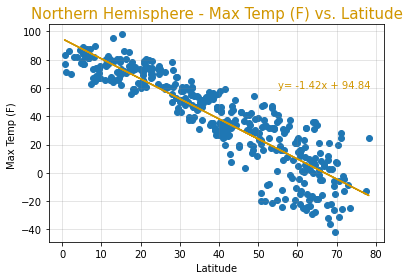

Rval = -0.8908498357780412


In [40]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(NH_city_df['Lat'].astype('float'),
                                                        NH_city_df['Max_Temp'].astype('float'))
regress_line = NH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(NH_city_df['Lat'],NH_city_df['Max_Temp'])
plt.plot(NH_city_df['Lat'], regress_line, color='#d19600')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (55,60), color='#d19600')
#plt.ylim(0, 25)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F) ')
plt.grid(color='grey', alpha=.25)
plt.title('Northern Hemisphere - Max Temp (F) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#d19600'})
#save the image
plt.savefig('../output_data/NH - Max Temp (F) vs. Latitude.png', format='png')
# show the image
plt.show()
print(f'Rval = {rval}')

####  Southern Hemisphere - Max Temp (F) vs. Latitude Linear Regression

The below plot 'Southern Hemisphere - Max Temp vs. Latitude' shows:
* There is also a negatively correlated relationship between Mx Temp and Latitude.
* This relationship is not as strongly correlated as in the northern hemisphere.

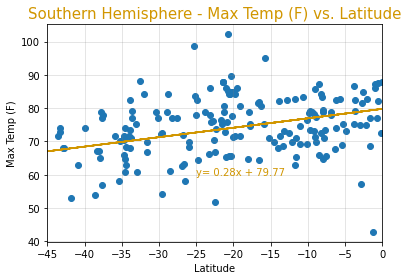

Rval = 0.3882068477828911


In [41]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(SH_city_df['Lat'].astype('float'),
                                                        SH_city_df['Max_Temp'].astype('float'))
regress_line = SH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(SH_city_df['Lat'],SH_city_df['Max_Temp'])
plt.plot(SH_city_df['Lat'], regress_line, color='#d19600')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (-25,60), color='#d19600')
plt.xlim(-45, 0)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(color='grey', alpha=.25)
plt.title('Southern Hemisphere - Max Temp (F) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#d19600'})
#save the image
plt.savefig('../output_data/SH - Max Temp (F) vs. Latitude.png', format='png')
# show the image
plt.show()
print(f'Rval = {rval}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The below plot 'Northern Hemisphere - Humidity (%) vs. Latitude' shows:
* Shows a positive correlation between humidity and latitude.
* There are a decent group of data point that would be considered outliers between 10-35 degress latitude

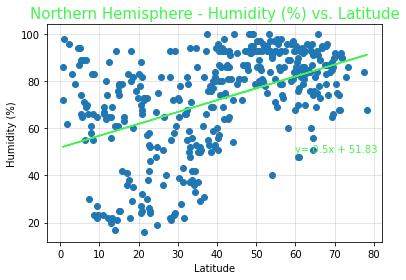

Rval = 0.464998470911926


In [42]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(NH_city_df['Lat'].astype('float'),
                                                        NH_city_df['Humidity'].astype('float'))
regress_line = NH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(NH_city_df['Lat'],NH_city_df['Humidity'])
plt.plot(NH_city_df['Lat'], regress_line, color='#42f54e')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (60,50), color='#42f54e')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(color='grey', alpha=.25)
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#42f54e'})
#save the image
plt.savefig('../output_data/NH - Humidity (%) vs. Latitude.png', format='png')
# show the image
plt.show()
print(f'Rval = {rval}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The below plot 'Southern Hemisphere - Humidity (%) vs. Latitude' shows:
* Not a strong correlation.
* This dataset conatains less outliers.

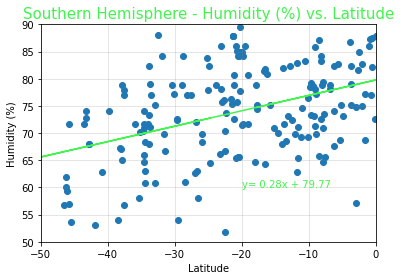

Rval = 0.3882068477828911


In [43]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(SH_city_df['Lat'].astype('float'),
                                                        SH_city_df['Max_Temp'].astype('float'))
regress_line = SH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(SH_city_df['Lat'],SH_city_df['Max_Temp'])
plt.plot(SH_city_df['Lat'], regress_line, color='#42f54e')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (-20,60), color='#42f54e')
#plt.ylim(0, 25)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(50,90)
plt.xlim(-50,0)
plt.grid(color='grey', alpha=.25)
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#42f54e'})
#save the image
plt.savefig('../output_data/SH - Humidity (%) vs. Latitude.png', format='png')
# show the image
plt.show()
print(f'Rval = {rval}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The below plot 'Northern Hemisphere - Cloudiness (%) vs. Latitude' shows:
* There is a positive correlation but the relationship is not very strong.
* The Northern Hemisphere dataset has a similar pattern to the southern dataset.

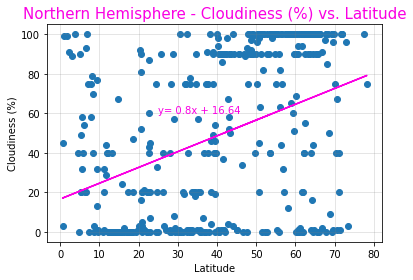

Rval = 0.389348026279584


In [44]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(NH_city_df['Lat'].astype('float'),
                                                        NH_city_df['Cloudiness'].astype('float'))
regress_line = NH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(NH_city_df['Lat'],NH_city_df['Cloudiness'])
plt.plot(NH_city_df['Lat'], regress_line, color='#fa00e3')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (25,60), color='#fa00e3')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(color='grey', alpha=.25)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#fa00e3'})
#save the image
plt.savefig('../output_data/NH - Cloudiness (%) vs. Latitude.png', format='png')
# show the image
plt.show()
print(f'Rval = {rval}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The below plot 'Southern Hemisphere - Cloudiness (%) vs. Latitude' shows:
* There is a positive correlation but the relationship is not very strong.
* The northern hemisphere has more datapoints than the southern.
* very similar rvalue ~.39 - .37

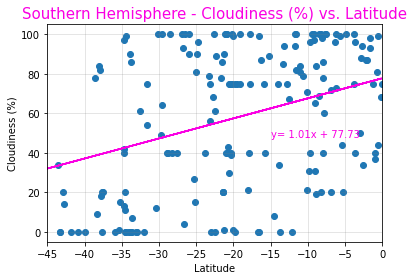

Rval = 0.3669828726067984


In [45]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(SH_city_df['Lat'].astype('float'),
                                                        SH_city_df['Cloudiness'].astype('float'))
regress_line = SH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(SH_city_df['Lat'], SH_city_df['Cloudiness'])
plt.plot(SH_city_df['Lat'], regress_line, color='#fa00e3')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (-15,48), color='#fa00e3')
plt.xlim(-45, 0)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(color='grey', alpha=.25)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : '#fa00e3'})
#save the image
plt.savefig('../output_data/SH - Humidity (%) vs. Latitude.png', format='png')
# show the image
plt.show()
print(f'Rval = {rval}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The below plot 'Northern Hemisphere - Wind Speed (mph) vs. Latitude' shows:
* The correlation between location and wind speed is so insignificant that it should not be considered.

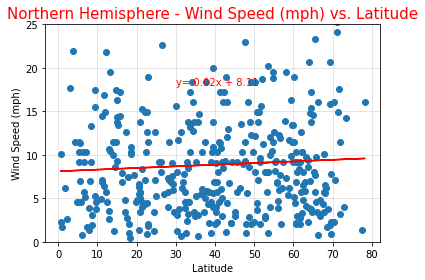

Rval = 0.06223233682534762


In [46]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(NH_city_df['Lat'].astype('float'),
                                                        NH_city_df['Wind_Speed'].astype('float'))
regress_line = NH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(NH_city_df['Lat'],NH_city_df['Wind_Speed'])
plt.plot(NH_city_df['Lat'], regress_line, color='red')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (30,18), color='red')
plt.ylim(0, 25)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(color='grey', alpha=.25)
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : 'red'})
#save the image
plt.savefig('../output_data/NH - Wind Speed (mph) vs. Latitude.png', format='png')
# show the image
plt.show()
print(f'Rval = {rval}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The below plot 'Southern Hemisphere - Wind Speed (mph) vs. Latitude' shows:
* The plot shows a slightly negative correalation between wind speed and latitude.

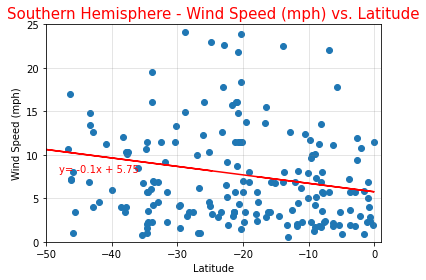

Rval = -0.2038877292178443


In [47]:
# calculate the linear regression
(slope, intercept, rval, pval, stddev) = sts.linregress(SH_city_df['Lat'].astype('float'),
                                                        SH_city_df['Wind_Speed'].astype('float'))
regress_line = SH_city_df['Lat']*slope+intercept

#plot scatter plot and regress line 
plt.scatter(SH_city_df['Lat'],SH_city_df['Wind_Speed'])
plt.plot(SH_city_df['Lat'], regress_line, color='red')
#format table
plt.annotate(f'y= {round(slope,2)}x + {round(intercept,2)}', (-48,8), color='red')
plt.ylim(0, 25)
plt.xlim(-50, 1)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(color='grey', alpha=.25)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude',
          loc='center',
          fontdict={'fontsize': 15,
                     'fontweight' : 4,
                     'color' : 'red'})
#save the image
plt.savefig('../output_data/SH - Wind Speed (mph) vs. Latitude.png', format='png')
# show the image
plt.show()
print(f'Rval = {rval}')